In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
netflix = pd.read_csv('netflix_titles.csv')

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

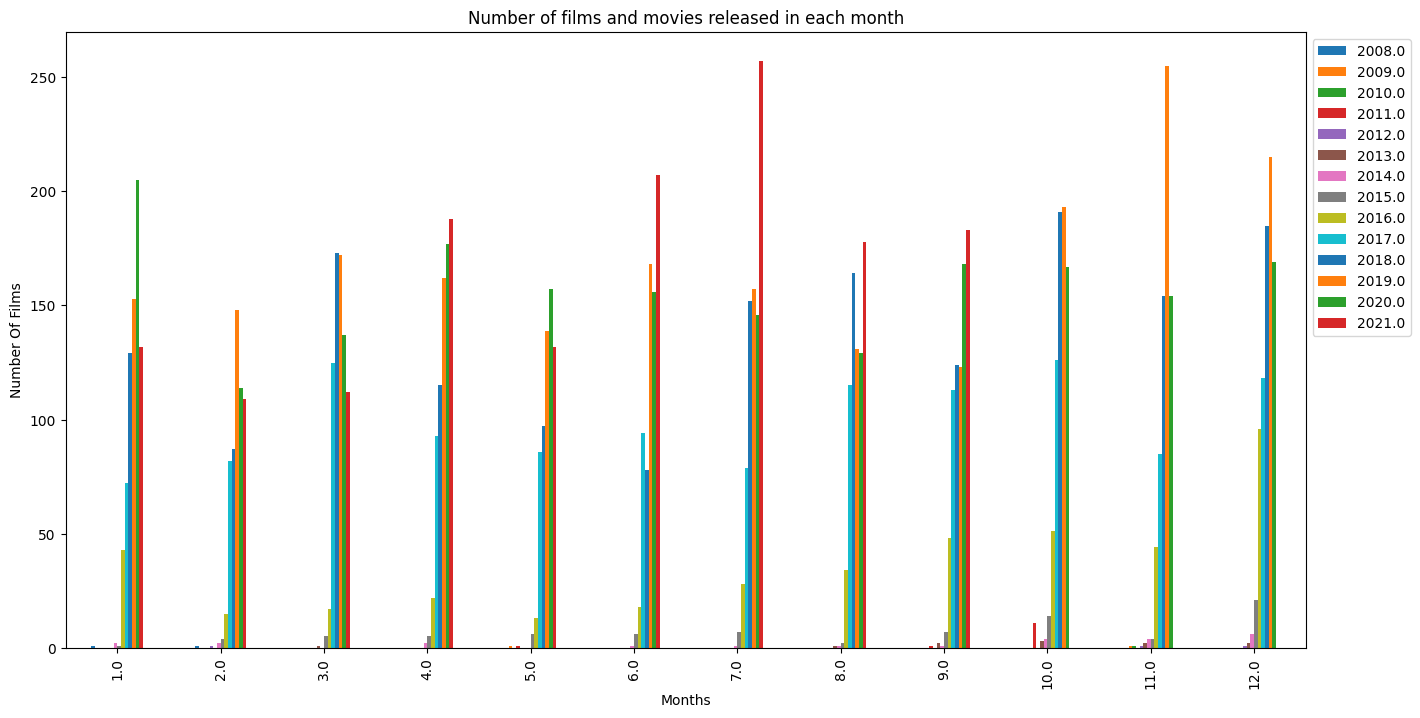

In [94]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

pd.crosstab(netflix['date_added'].dt.month, netflix['date_added'].dt.year).plot(kind = 'bar', figsize = (16,8))
plt.legend(bbox_to_anchor = (1.0,1.0))

plt.title("Number of series and movies released in each month")
plt.xlabel("Months")
plt.ylabel("Number Of Films")

plt.show()

Mês com mais lançamentos = mês 7
Mês com menos lançamentos = mês 2

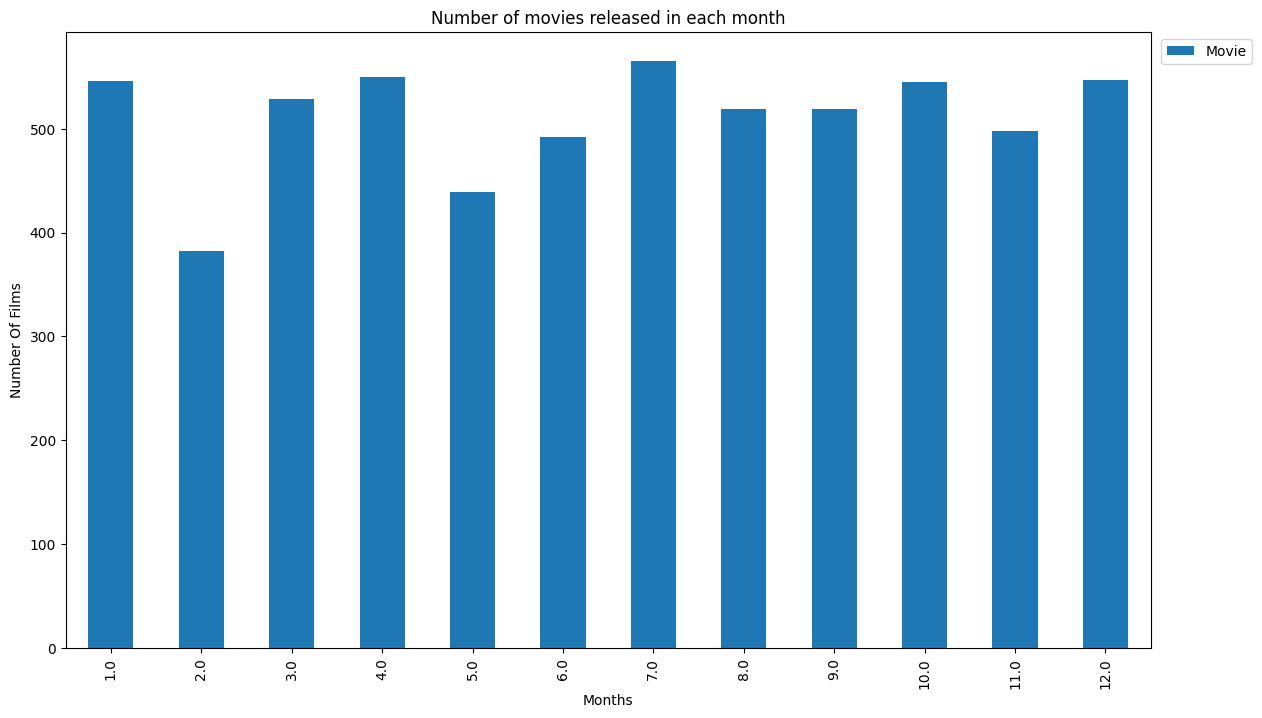

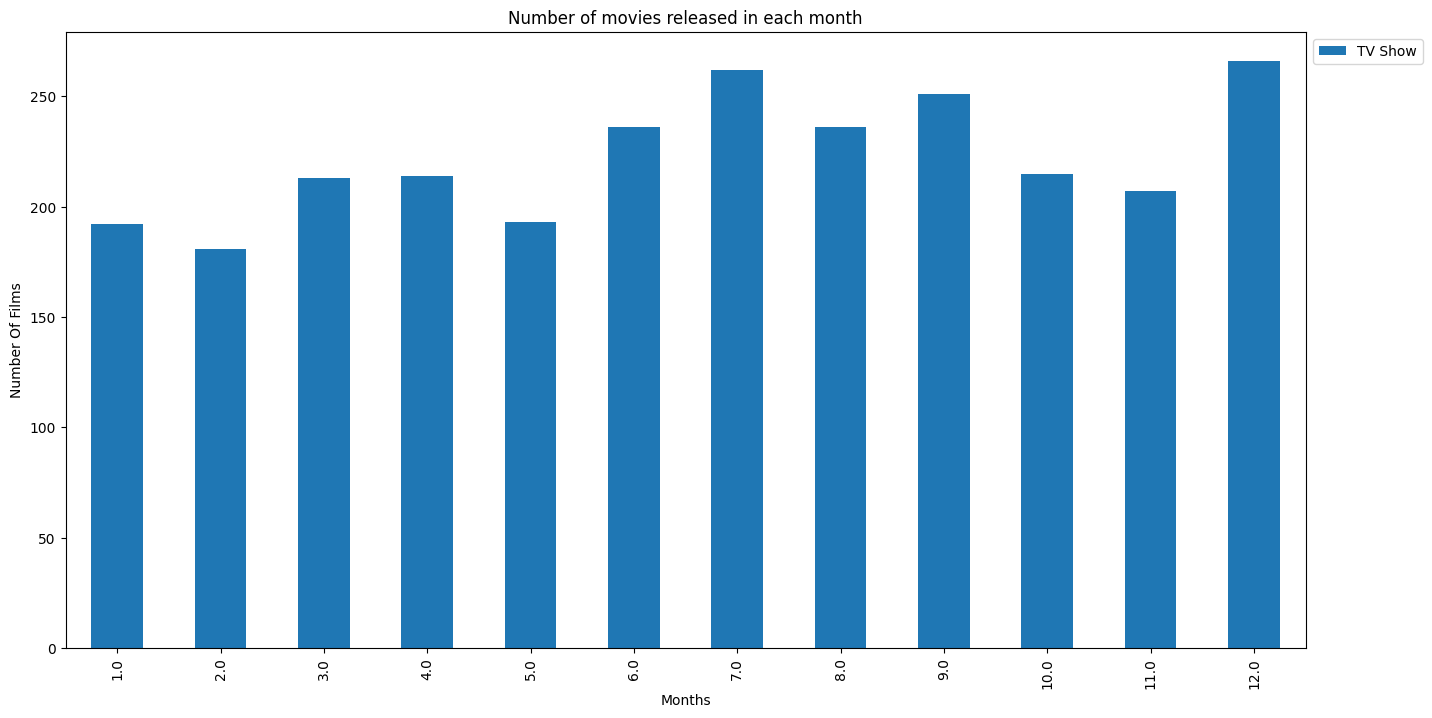

In [114]:
movies = netflix[ netflix['type'] == 'Movie']

pd.crosstab(netflix['date_added'].dt.month, movies['type']).plot(kind = 'bar', figsize = (14,8))
plt.legend(bbox_to_anchor = (1.1,1.0))

plt.title("Number of movies released in each month")
plt.xlabel("Months")
plt.ylabel("Number Of Films")

plt.show()

series = netflix[ netflix['type'] == 'TV Show']

pd.crosstab(netflix['date_added'].dt.month, series['type']).plot(kind = 'bar', figsize = (16,8))
plt.legend(bbox_to_anchor = (1.1,1.0))

plt.title("Number of movies released in each month")
plt.xlabel("Months")
plt.ylabel("Number Of Films")

plt.show()

In [174]:
movies['duration'] = movies['duration'].apply(lambda x: str(x).replace(" min", ""))
movies['duration'] = movies['duration'].astype('float64')

media = movies['duration'].mean()
desvio = movies['duration'].std(ddof=0)

print(media, desvio)

countries = movies['country'].value_counts()

countries.sort_values(ascending=False)

movies.boxplot(column=movies['country'].value_counts(), by='countries')


99.57718668407311 28.288285047638155


C:\Users\Pichau\AppData\Local\Temp\ipykernel_10080\1207707623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].apply(lambda x: str(x).replace(" min", ""))
C:\Users\Pichau\AppData\Local\Temp\ipykernel_10080\1207707623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].astype('float64')


ValueError: Can only compare identically-labeled Series objects